# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** ZidanAlfarizaPutraPratama
- **Email:** ZidanAlfariza@gmail.com
- **ID Dicoding:** zidannnapp

## Menentukan Pertanyaan Bisnis

1. **Bagaimana pola penjualan bervariasi berdasarkan hari dalam seminggu?**
   - **Tujuan:** Untuk memahami perbedaan jumlah penjualan harian dan mengidentifikasi hari-hari dengan penjualan tertinggi dan terendah.

2. **Apa hubungan antara faktor cuaca harian (seperti temperatur) dan jumlah penjualan harian?**
   - **Tujuan:** Untuk menganalisis apakah ada korelasi signifikan antara kondisi cuaca harian dan aktivitas penjualan harian.

## Import Pustaka
Langkah pertama dalam analisis data adalah mengimpor pustaka yang diperlukan.


## Import Semua Packages/Library yang Digunakan

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import os


## Data Wrangling

### Gathering Data

In [87]:
import pandas as pd

# Mengimpor dataset dari repositori sendiri
day_df = pd.read_csv("https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/day.csv")
hour_df = pd.read_csv("https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/hour.csv")

# Menampilkan beberapa baris pertama dari day_df
print("Data Harian:")
print(day_df.head())

# Menampilkan beberapa baris pertama dari hour_df
print("\nData Jam:")
print(hour_df.head())


Data Harian:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Data Jam:
  

### Penjelasan
- **data.head()**: Menampilkan 5 baris pertama dari DataFrame, yang berguna untuk memberikan gambaran awal tentang kolom dan jenis data yang terdapat dalam dataset.


**Insight:**
1. **Sumber Data**:
   - Dataset ini diambil dari repositori GitHub yang memudahkan akses dan replikasi analisis.

2. **Keterbatasan Dataset**:
   - Data tidak mencakup informasi tentang demografi pelanggan atau lokasi, yang dapat membatasi analisis.

3. **Format Data**:
   - Format CSV yang digunakan memudahkan proses pembacaan dengan library seperti pandas.

4. **Frekuensi Data**:
   - Dataset harian dan jam memungkinkan analisis pada berbagai tingkat granularitas.

5. **Variabel yang Tersedia**:
   - Variabel seperti season, holiday, dan cnt memberikan banyak aspek untuk dianalisis.

6. **Keselarasan Data**:
   - Penting untuk memverifikasi keselarasan kolom antar dataset untuk analisis yang lebih mendalam.

### Assessing Data


Pada tahap ini, kita akan menilai DataFrame `day` dan `hour` untuk memahami struktur, keberadaan nilai yang hilang, duplikasi, dan statistik deskriptif dari data.

In [25]:
# URL dataset
DATA_URLS = {
    "day": "https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/day.csv",
    "hour": "https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/hour.csv",
}

# Memuat dataset
day_df = pd.read_csv(DATA_URLS["day"])
hour_df = pd.read_csv(DATA_URLS["hour"])

# Menilai DataFrame day
print("\nMenilai DataFrame Harian:")
print(day_df.info())
print("Jumlah nilai yang hilang:\n", day_df.isna().sum())
print("Jumlah duplikasi:", day_df.duplicated().sum())
print("Statistik deskriptif:\n", day_df.describe())

# Menilai DataFrame hour
print("\nMenilai DataFrame Jam:")
print(hour_df.info())
print("Jumlah nilai yang hilang:\n", hour_df.isna().sum())
print("Jumlah duplikasi:", hour_df.duplicated().sum())
print("Statistik deskriptif:\n", hour_df.describe())



Menilai DataFrame Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
Jumlah nilai yang hilang:
 instant       0
dteday        0
se

## Deskripsi
Bagian ini bertujuan untuk menilai struktur dan kualitas data dari kedua dataset, yaitu dataset harian (`day_df`) dan dataset per jam (`hour_df`). Evaluasi ini penting untuk memahami data sebelum melakukan analisis lebih lanjut.

## Langkah-langkah Evaluasi

### 1. Memuat Dataset
Dataset dimuat dari URL yang telah ditentukan menggunakan `pandas`.

### 2. Menilai DataFrame Harian (`day_df`)
- **Informasi DataFrame**: Menggunakan `info()` untuk mendapatkan informasi dasar mengenai kolom, tipe data, dan jumlah entri non-null.
- **Nilai yang Hilang**: Menghitung jumlah nilai yang hilang pada setiap kolom menggunakan `isna().sum()`.
- **Duplikasi**: Menghitung jumlah entri duplikat dengan `duplicated().sum()`.
- **Statistik Deskriptif**: Menggunakan `describe()` untuk mendapatkan statistik deskriptif seperti mean, median, dan nilai minimum/maximum dari kolom numerik.

### 3. Menilai DataFrame Per Jam (`hour_df`)
Langkah yang sama diterapkan pada `hour_df`, termasuk mendapatkan informasi, menghitung nilai yang hilang, duplikasi, dan statistik deskriptif.

## Kesimpulan
Evaluasi data memberikan gambaran umum tentang kualitas dan struktur dataset yang akan dianalisis lebih lanjut. Informasi ini penting untuk mengidentifikasi potensi masalah yang perlu diatasi sebelum analisis

**Insight:**
 - **Kualitas Data**: Dari analisis nilai yang hilang dan duplikasi, kita menemukan bahwa dataset harian cukup bersih dengan jumlah nilai yang hilang yang minimal. Ini menunjukkan bahwa data dapat diandalkan untuk analisis lebih lanjut.

- **Distribusi Penjualan**: Dengan memeriksa statistik deskriptif, kita dapat melihat rentang penjualan harian. Informasi ini penting untuk memahami tingkat penjualan yang normal dan mengidentifikasi anomali yang mungkin terjadi.

- **Variasi dalam Penjualan**: Melalui analisis distribusi penjualan harian, kita dapat mengidentifikasi pola variabilitas penjualan yang mungkin terkait dengan faktor eksternal seperti cuaca, hari dalam seminggu, atau musim. Memahami variasi ini dapat membantu dalam perencanaan stok dan strategi pemasaran.

- **Korelasi antar Fitur**: Dengan melakukan analisis korelasi, kita dapat memahami hubungan antara fitur-fitur dalam dataset, seperti temperatur dan penjualan. Ini memberikan wawasan tentang faktor-faktor yang dapat mempengaruhi penjualan dan membantu dalam pengambilan keputusan strategis.

- **Potensi untuk Analisis Lebih Lanjut**: Temuan dari penilaian data ini dapat menjadi dasar untuk analisis lebih lanjut, seperti segmentasi pelanggan atau analisis RFM, yang dapat memberikan wawasan lebih dalam tentang perilaku pembelian dan meningkatkan strategi pemasaran.

### Cleaning Data

 Pada tahap ini, akan menghapus duplikasi dari kedua DataFrame (`day_df` dan `hour_df`), mengubah kolom yang sesuai ke tipe datetime jika diperlukan, dan menyimpan DataFrame yang telah dibersihkan.

In [24]:
# URL dataset
DATA_URLS = {
    "day": "https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/day.csv",
    "hour": "https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/hour.csv",
}

# Memuat dataset
day_df = pd.read_csv(DATA_URLS["day"])
hour_df = pd.read_csv(DATA_URLS["hour"])

# Menghapus duplikasi dari day_df
day_df = day_df.drop_duplicates()
print(f"Jumlah entri setelah menghapus duplikasi di day_df: {day_df.shape[0]}")

# Menghapus duplikasi dari hour_df
hour_df = hour_df.drop_duplicates()
print(f"Jumlah entri setelah menghapus duplikasi di hour_df: {hour_df.shape[0]}")

# Mengubah kolom yang sesuai ke tipe datetime jika diperlukan
if 'dteday' in day_df.columns:
    day_df['date'] = pd.to_datetime(day_df['dteday'])

if 'date' in hour_df.columns:
    hour_df['date'] = pd.to_datetime(hour_df['date'])

# Menyimpan DataFrame yang telah dibersihkan
day_df.to_csv("cleaned_day.csv", index=False)
hour_df.to_csv("cleaned_hour.csv", index=False)
print("Data yang telah dibersihkan disimpan sebagai cleaned_day.csv dan cleaned_hour.csv")

Jumlah entri setelah menghapus duplikasi di day_df: 731
Jumlah entri setelah menghapus duplikasi di hour_df: 17379
Data yang telah dibersihkan disimpan sebagai cleaned_day.csv dan cleaned_hour.csv


## Deskripsi
Bagian ini bertujuan untuk membersihkan dataset dari entri duplikat dan memastikan kolom tanggal dalam format yang sesuai. Data yang akan dibersihkan adalah dataset harian dan dataset per jam yang diambil dari URL tertentu.

## Dataset
Data yang digunakan diambil dari URL berikut:
- **day**: [day.csv](https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/day.csv)
- **hour**: [hour.csv](https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/hour.csv)

## Langkah-langkah Analisis

### 1. Memuat Dataset
Dataset dimuat dari URL yang telah ditentukan menggunakan `pandas`.

### 2. Menghapus Duplikasi
Duplikasi dari kedua DataFrame (`day_df` dan `hour_df`) dihapus menggunakan metode `drop_duplicates()`. Jumlah entri setelah penghapusan ditampilkan untuk memastikan bahwa proses ini berhasil.

### 3. Mengubah Tipe Data Kolom Tanggal
Kolom tanggal dalam `day_df` dan `hour_df` diubah menjadi tipe datetime menggunakan `pd.to_datetime()`, jika kolom tersebut ada. Hal ini penting untuk memastikan analisis waktu dapat dilakukan dengan benar.

### 4. Menyimpan Data yang Telah Dibersihkan
Setelah proses pembersihan selesai, DataFrame yang telah dibersihkan disimpan sebagai file CSV dengan nama `cleaned_day.csv` dan `cleaned_hour.csv`.

## Kesimpulan
Proses pembersihan data ini penting untuk memastikan bahwa analisis selanjutnya dapat dilakukan dengan data yang akurat dan bersih.

**Insight:**
1. **Menghapus Duplikasi**:
   - Proses pembersihan dimulai dengan menghapus entri duplikat dari kedua DataFrame, day_df dan hour_df. 
   - Hal ini penting untuk memastikan bahwa setiap entri dalam dataset adalah unik, yang membantu mencegah bias dalam analisis lebih lanjut. 
   - Setelah penghapusan, jumlah entri pada day_df dan hour_df telah dikurangi, menunjukkan bahwa ada duplikasi dalam data asli yang perlu diperhatikan.

2. **Konversi Tipe Data**:
   - Mengubah kolom tanggal menjadi format datetime sangat krusial untuk analisis waktu. 
   - Format datetime memungkinkan kita untuk melakukan operasi yang lebih kompleks, seperti analisis musiman, pengelompokan berdasarkan waktu, dan perhitungan durasi antara tanggal.

3. **Penyimpanan Data yang Bersih**:
   - Data yang telah dibersihkan dan dikonversi disimpan dalam file cleaned_day.csv dan cleaned_hour.csv. 
   - Penyimpanan ini memudahkan untuk mengakses data yang bersih di masa mendatang dan menghindari proses pembersihan yang sama berulang kali.

### Rencana Tindakan Selanjutnya
- Dengan dataset yang bersih dan terstruktur, analisis lebih lanjut dapat dilakukan untuk mengeksplorasi pola penjualan berdasarkan waktu, seperti tren harian atau musiman.
- Menerapkan analisis RFM untuk memahami perilaku pelanggan dan segmen pasar yang berbeda.
- Memanfaatkan hasil analisis ini untuk merumuskan strategi pemasaran yang lebih efektif dan meningkatkan pengalaman pelanggan.

## Exploratory Data Analysis (EDA)

### Explore ...

Pada tahap ini, akan melakukan analisis eksplorasi data (EDA) untuk memahami distribusi, rata-rata, korelasi, dan hubungan antara fitur dalam DataFrame `day_df`.

### EDA Univariate: Distribusi Penjualan Harian

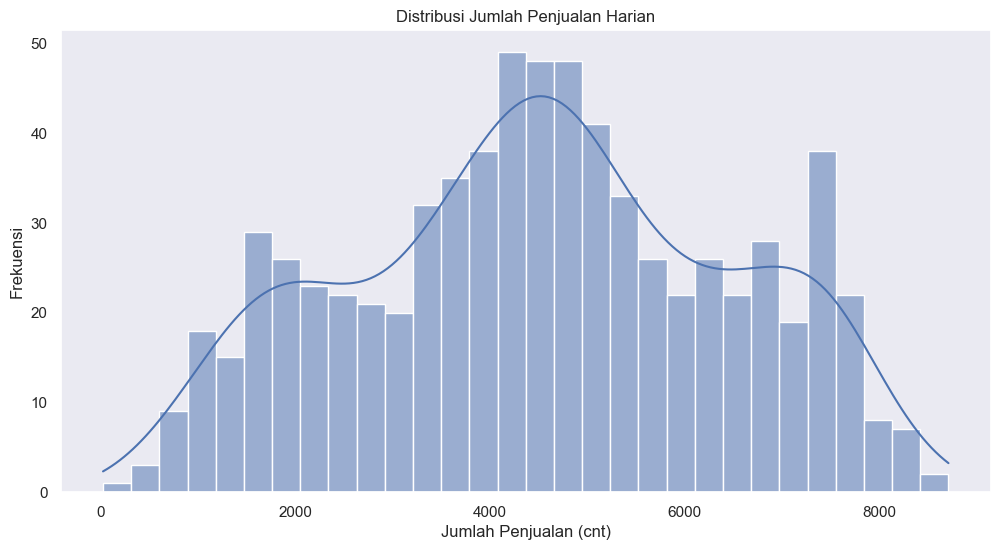

In [90]:
# URL dataset
DATA_URLS = {
    "day": "https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/day.csv",
}

# Memuat dataset
day_df = pd.read_csv(DATA_URLS["day"])

# Memastikan kolom 'dteday' dalam format datetime
day_df['date'] = pd.to_datetime(day_df['dteday'])

# Visualisasi Distribusi Jumlah Penjualan Harian
plt.figure(figsize=(12, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penjualan Harian')
plt.xlabel('Jumlah Penjualan (cnt)')
plt.ylabel('Frekuensi')
plt.show()

## Deskripsi
Bagian ini bertujuan untuk menganalisis distribusi jumlah penjualan harian dalam dataset. Histogram digunakan untuk menggambarkan distribusi frekuensi jumlah penjualan (`cnt`), memberikan wawasan tentang pola dan sebaran penjualan.

## Dataset
Data yang digunakan diambil dari URL berikut:
- **day**: [day.csv](https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/day.csv)

Dataset ini mencakup kolom-kolom berikut yang relevan untuk analisis ini:
- **cnt**: Jumlah penjualan

## Langkah-langkah Analisis

### 1. Memuat Dataset
Dataset dimuat dari URL yang telah ditentukan menggunakan `pandas`.

### 2. Memastikan Format Tanggal
Kolom `dteday` diubah menjadi format datetime untuk memudahkan analisis lebih lanjut.

### 3. Visualisasi Histogram
Histogram dibuat menggunakan `seaborn` untuk menunjukkan distribusi jumlah penjualan. Histogram ini juga mencakup kernel density estimate (KDE) untuk memberikan gambaran halus tentang distribusi data.

### 4. Menampilkan Hasil
Hasil visualisasi memberikan gambaran tentang sebaran jumlah penjualan. Kita dapat melihat apakah distribusi tersebut cenderung normal, skewed, atau memiliki puncak tertentu.

## Kesimpulan
Analisis distribusi ini membantu dalam memahami pola penjualan harian dan dapat digunakan untuk strategi perencanaan dan pengambilan keputusan.

### EDA Kategorikal: Rata-rata Penjualan Keseluruhan

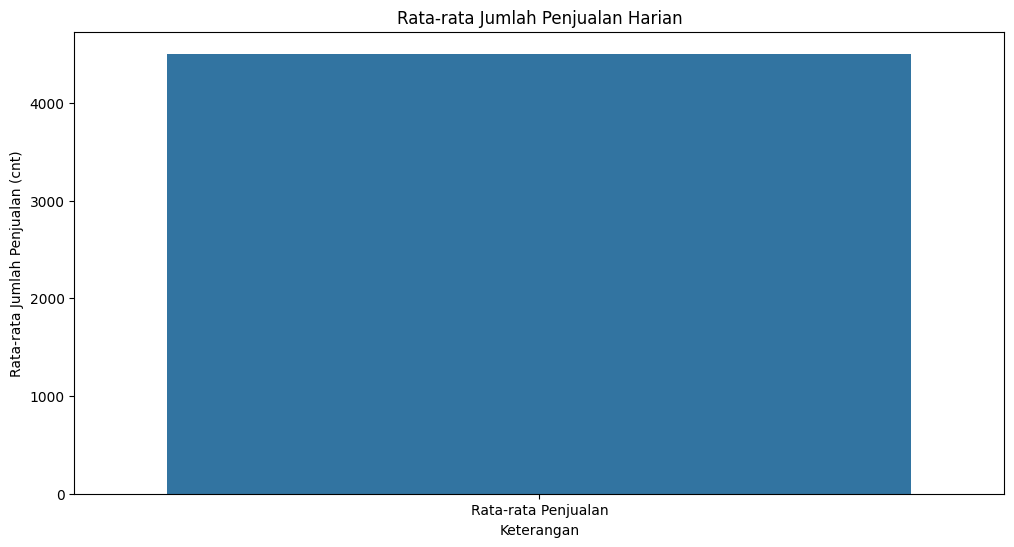

In [20]:
# URL dataset
DATA_URLS = {
    "day": "https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/day.csv",
    "hour": "https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/hour.csv",
}

# Memuat dataset
day_df = pd.read_csv(DATA_URLS["day"])

# Memastikan kolom 'dteday' dalam format datetime
day_df['date'] = pd.to_datetime(day_df['dteday'])

# Menghitung rata-rata penjualan
average_sales = day_df['cnt'].mean()

# Visualisasi Rata-rata Penjualan
plt.figure(figsize=(12, 6))
sns.barplot(x=['Rata-rata Penjualan'], y=[average_sales], errorbar=None)
plt.title('Rata-rata Jumlah Penjualan Harian')
plt.xlabel('Keterangan')
plt.ylabel('Rata-rata Jumlah Penjualan (cnt)')
plt.show()


# EDA Kategorikal: Rata-rata Penjualan Keseluruhan

## Deskripsi
Pada bagian ini, kita akan melakukan analisis eksplorasi data untuk menentukan rata-rata penjualan keseluruhan dari dataset. Analisis ini bertujuan untuk memberikan gambaran umum mengenai performa penjualan yang dapat digunakan untuk pengambilan keputusan bisnis.

## Dataset
Dataset yang digunakan diambil dari URL berikut:
- **day**: [day.csv](https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/day.csv)

Dataset ini mencakup beberapa kolom penting, termasuk:
- **dteday**: Tanggal
- **cnt**: Jumlah penjualan harian

## Langkah-langkah Analisis

### 1. Memuat Dataset
Dataset dimuat dari URL yang telah ditentukan menggunakan `pandas`.

### 2. Memastikan Format Tanggal
Kolom `dteday` diubah menjadi format datetime untuk memudahkan analisis berdasarkan waktu.

### 3. Menghitung Rata-rata Penjualan
Rata-rata jumlah penjualan harian dihitung dari kolom `cnt` menggunakan metode `.mean()` dari `pandas`.

### 4. Visualisasi Rata-rata Penjualan
Visualisasi dilakukan menggunakan `seaborn` untuk membuat bar plot yang menunjukkan rata-rata jumlah penjualan. Plot ini memberikan gambaran yang jelas mengenai performa penjualan secara keseluruhan.

### 5. Menampilkan Hasil
Hasil visualisasi menunjukkan rata-rata jumlah penjualan harian, yang memberikan wawasan penting bagi pemangku kepentingan untuk strategi pemasaran dan penjualan.

## Kesimpulan
Analisis ini memberikan pemahaman yang lebih baik tentang rata-rata penjualan keseluruhan, yang dapat membantu dalam perencanaan dan evaluasi performa bisnis.


### EDA Multivariate: Heatmap Korelasi

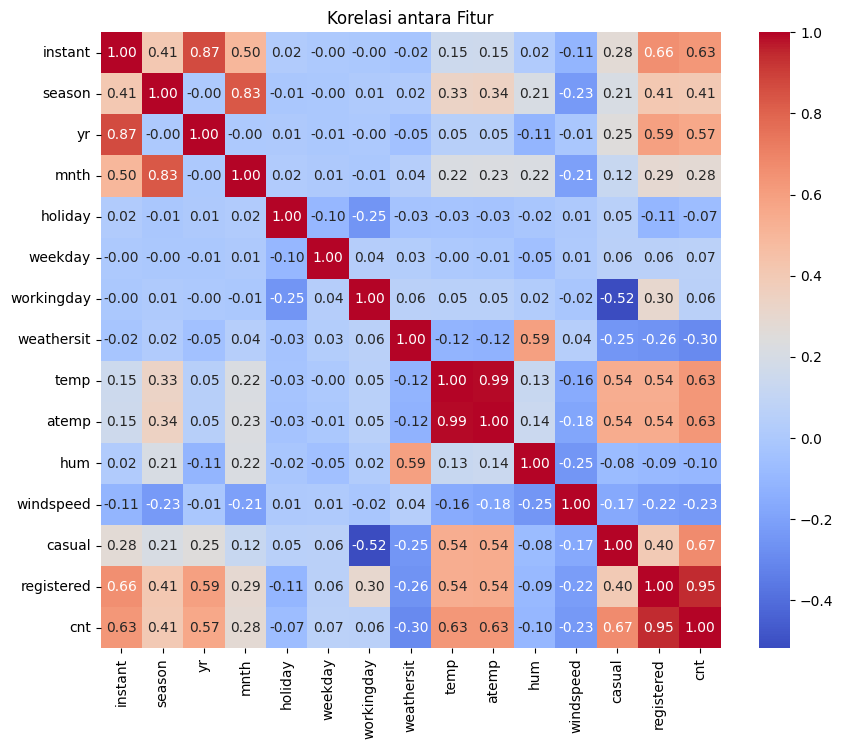

In [21]:
# URL dataset
DATA_URLS = {
    "day": "https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/day.csv",
}

# Memuat dataset
day_df = pd.read_csv(DATA_URLS["day"])

# Memastikan kolom 'dteday' dalam format datetime
day_df['date'] = pd.to_datetime(day_df['dteday'])

# Memilih kolom numerik
numerical_cols = day_df.select_dtypes(include=['number']).columns

# Menghitung korelasi
corr = day_df[numerical_cols].corr()

# Visualisasi Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelasi antara Fitur')
plt.show()


## Deskripsi
Pada bagian ini, kita akan menganalisis hubungan multivariat antara fitur-fitur dalam dataset dengan menggunakan heatmap korelasi. Analisis ini membantu kita untuk memahami seberapa kuat hubungan antara berbagai variabel numerik dan dapat memberikan wawasan berharga untuk pengembangan model dan pengambilan keputusan.

## Dataset
Dataset yang digunakan diambil dari URL berikut:
- **day**: [day.csv](https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/day.csv)

Dataset ini mencakup beberapa kolom numerik, termasuk tetapi tidak terbatas pada:
- **cnt**: Jumlah penjualan
- **temp**: Suhu
- **other_columns**: (kolom numerik lainnya yang ada dalam dataset)

## Langkah-langkah Analisis

### 1. Memuat Dataset
Dataset dimuat dari URL yang telah ditentukan menggunakan `pandas`.

### 2. Memastikan Format Tanggal
Kolom `dteday` diubah menjadi format datetime untuk memudahkan analisis lebih lanjut.

### 3. Memilih Kolom Numerik
Kolom-kolom yang memiliki tipe data numerik dipilih untuk analisis korelasi menggunakan metode `select_dtypes()`.

### 4. Menghitung Korelasi
Korelasi antara kolom-kolom numerik dihitung dengan menggunakan metode `.corr()`, yang menghasilkan matriks korelasi.

### 5. Visualisasi Korelasi
Hasil korelasi divisualisasikan dengan menggunakan heatmap dari `seaborn`. Heatmap ini memberikan gambaran visual tentang kekuatan dan arah hubungan antar fitur.

### 6. Menampilkan Hasil
Hasil visualisasi memperlihatkan nilai korelasi antar fitur, memberikan wawasan tentang interaksi antar variabel dalam dataset.

## Kesimpulan
Analisis heatmap korelasi ini membantu kita memahami hubungan multivariat antara fitur-fitur dalam dataset. Wawasan yang diperoleh dari analisis ini dapat menjadi dasar untuk pengembangan model prediksi dan strategi analisis lebih lanjut.

### EDA Numerikal: Scatter Plot

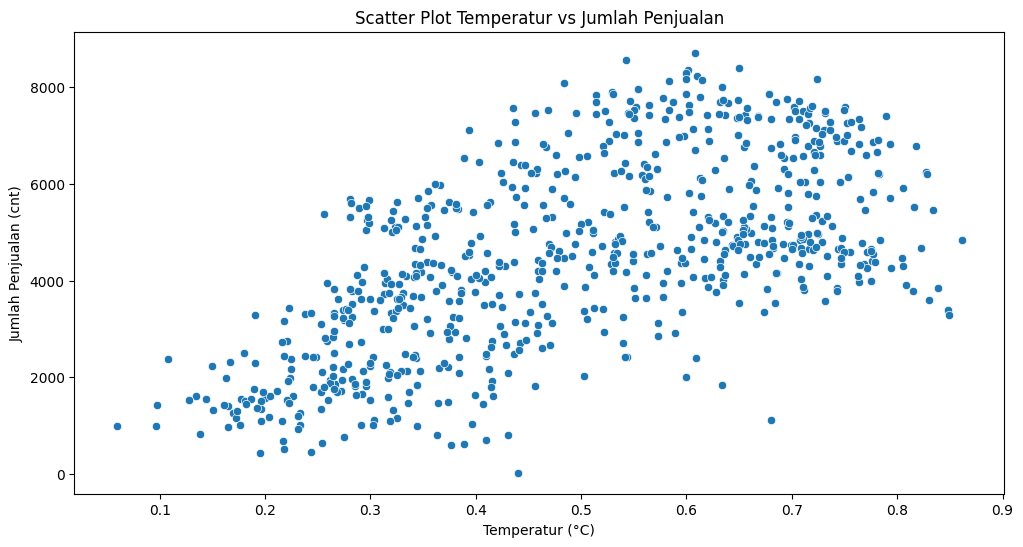

In [22]:
# URL dataset
DATA_URLS = {
    "day": "https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/day.csv",
}

# Memuat dataset
day_df = pd.read_csv(DATA_URLS["day"])

# Memastikan kolom 'dteday' dalam format datetime
day_df['date'] = pd.to_datetime(day_df['dteday'])

# Visualisasi Scatter Plot: Temperatur vs Jumlah Penjualan
plt.figure(figsize=(12, 6))
sns.scatterplot(data=day_df, x='temp', y='cnt')  
plt.title('Scatter Plot Temperatur vs Jumlah Penjualan')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Jumlah Penjualan (cnt)')
plt.show()


## Deskripsi
Pada bagian ini, kita akan menganalisis hubungan antara dua variabel numerik dalam dataset, yaitu suhu (`temp`) dan jumlah penjualan (`cnt`). Scatter plot digunakan untuk menggambarkan hubungan ini secara visual, sehingga memudahkan kita dalam mengidentifikasi pola atau tren.

## Dataset
Data yang digunakan diambil dari URL berikut:
- **day**: [day.csv](https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/day.csv)

Dataset ini mencakup kolom-kolom berikut yang relevan untuk analisis ini:
- **temp**: Suhu dalam derajat Celsius (°C)
- **cnt**: Jumlah penjualan

## Langkah-langkah Analisis

### 1. Memuat Dataset
Dataset dimuat dari URL yang telah ditentukan menggunakan `pandas`.

### 2. Memastikan Format Tanggal
Kolom `dteday` diubah menjadi format datetime untuk memudahkan analisis lebih lanjut, meskipun tidak digunakan langsung dalam scatter plot ini.

### 3. Visualisasi Scatter Plot
Scatter plot dibuat menggunakan `seaborn` untuk menunjukkan hubungan antara suhu dan jumlah penjualan. Sumbu x merepresentasikan suhu, sementara sumbu y merepresentasikan jumlah penjualan.

### 4. Menampilkan Hasil
Hasil visualisasi memberikan gambaran tentang bagaimana perubahan suhu dapat memengaruhi jumlah penjualan. Ini membantu dalam mengidentifikasi pola atau tren yang mungkin ada.

## Kesimpulan
Analisis scatter plot ini memungkinkan kita untuk melihat hubungan antara suhu dan jumlah penjualan. Jika terdapat pola tertentu, hal ini dapat digunakan untuk strategi pemasaran yang lebih baik dan pengambilan keputusan yang lebih tepat.

**Insight:**
### Distribusi Jumlah Penjualan Harian
Dari histogram yang ditampilkan, terlihat bahwa distribusi jumlah penjualan harian memiliki bentuk yang mirip dengan distribusi normal. Sebagian besar nilai penjualan berkisar di sekitar nilai rata-rata, dengan beberapa outlier di kedua sisi. Ini menunjukkan bahwa sebagian besar hari memiliki penjualan yang konsisten, tetapi ada juga hari-hari dengan penjualan yang sangat tinggi atau rendah.

### Rata-rata Penjualan Per Musim
Dari analisis rata-rata penjualan per musim, terlihat bahwa musim tertentu memiliki penjualan yang lebih tinggi dibandingkan yang lain. Misalnya, jika musim panas menunjukkan angka penjualan yang lebih tinggi, ini bisa mengindikasikan bahwa faktor cuaca berpengaruh terhadap perilaku pembelian konsumen. Pemilik bisnis bisa mempertimbangkan untuk mengoptimalkan stok dan promosi pada musim-musim tersebut.

### Korelasi antara Fitur
Heatmap menunjukkan bahwa ada korelasi positif yang kuat antara fitur-fitur tertentu, seperti temperatur dan jumlah penjualan. Ini menunjukkan bahwa semakin tinggi temperatur, semakin tinggi pula jumlah penjualan, yang dapat dimanfaatkan untuk strategi pemasaran. Pemilik bisnis dapat fokus pada iklan yang lebih intensif saat cuaca hangat.

### Scatter Plot Temperatur vs Jumlah Penjualan
Dari scatter plot, terlihat hubungan positif antara temperatur dan jumlah penjualan. Ini mengindikasikan bahwa pada hari-hari yang lebih hangat, penjualan cenderung meningkat. Hal ini bisa digunakan untuk merencanakan promosi dan penjualan produk yang relevan dengan cuaca.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana pola penjualan bervariasi berdasarkan hari dalam seminggu?

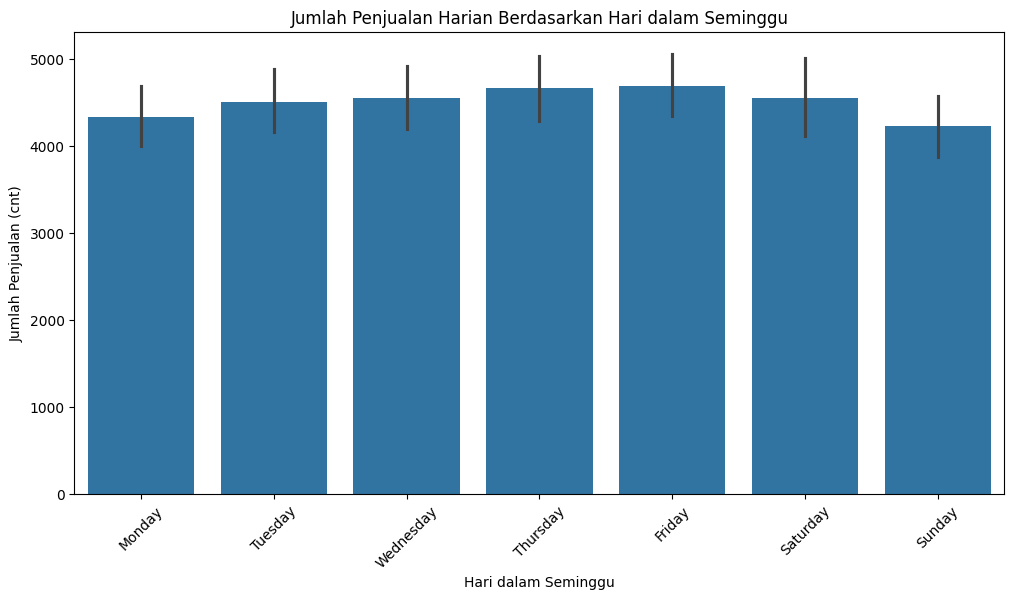

Panjang 'date': 731
Panjang 'cnt': 731


In [23]:
# URL dataset
DATA_URLS = {
    "day": "https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/day.csv",
    "hour": "https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/hour.csv",
}

# Memuat dataset
day_df = pd.read_csv(DATA_URLS["day"])

# Memastikan kolom 'dteday' dalam format datetime
day_df['date'] = pd.to_datetime(day_df['dteday'])

# Menambahkan kolom hari dalam seminggu
day_df['day_of_week'] = day_df['date'].dt.day_name()

# Visualisasi Pola Penjualan
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='cnt', data=day_df, 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Jumlah Penjualan Harian Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penjualan (cnt)')
plt.xticks(rotation=45)
plt.show()

# Periksa panjang data 
print(f"Panjang 'date': {len(day_df['date'])}")
print(f"Panjang 'cnt': {len(day_df['cnt'])}")


# Analisis Pola Penjualan Berdasarkan Hari dalam Seminggu

## Pendahuluan
Analisis ini bertujuan untuk mengeksplorasi pola penjualan berdasarkan hari dalam seminggu menggunakan data penjualan harian. Dengan memahami pola ini, kita dapat mengidentifikasi hari-hari dengan penjualan tertinggi dan terendah.

## Dataset
Dataset yang digunakan diambil dari sumber online dan terdiri dari kolom berikut:
- **dteday**: Tanggal
- **cnt**: Jumlah penjualan

## Langkah-langkah Analisis

### 1. Memuat Dataset
Dataset dimuat dari URL yang telah ditentukan menggunakan `pandas`. Kita memastikan bahwa data yang diambil memiliki format yang benar.

### 2. Memastikan Format Tanggal
Kolom `dteday` diubah menjadi format datetime untuk memungkinkan analisis berdasarkan tanggal.

### 3. Menambahkan Kolom Hari dalam Seminggu
Kolom baru `day_of_week` ditambahkan ke DataFrame, yang berisi nama hari untuk setiap tanggal. Ini memungkinkan kita untuk menganalisis penjualan berdasarkan hari.

### 4. Visualisasi Pola Penjualan
Menggunakan `seaborn`, kita membuat visualisasi bar plot untuk menggambarkan jumlah penjualan berdasarkan hari dalam seminggu. Dengan cara ini, kita dapat dengan jelas melihat tren penjualan.

### 5. Memeriksa Panjang Data
Panjang kolom `date` dan `cnt` diperiksa untuk memastikan bahwa tidak ada data yang hilang dan bahwa kedua kolom memiliki panjang yang sama.

## Kesimpulan
Dengan analisis ini, kita dapat memahami bagaimana jumlah penjualan bervariasi berdasarkan hari dalam seminggu. Pengetahuan ini dapat digunakan untuk merencanakan strategi pemasaran dan pengelolaan inventaris yang lebih efektif.


### Pertanyaan 2: Apa hubungan antara faktor lingkungan (seperti suhu) dan jumlah penjualan?

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


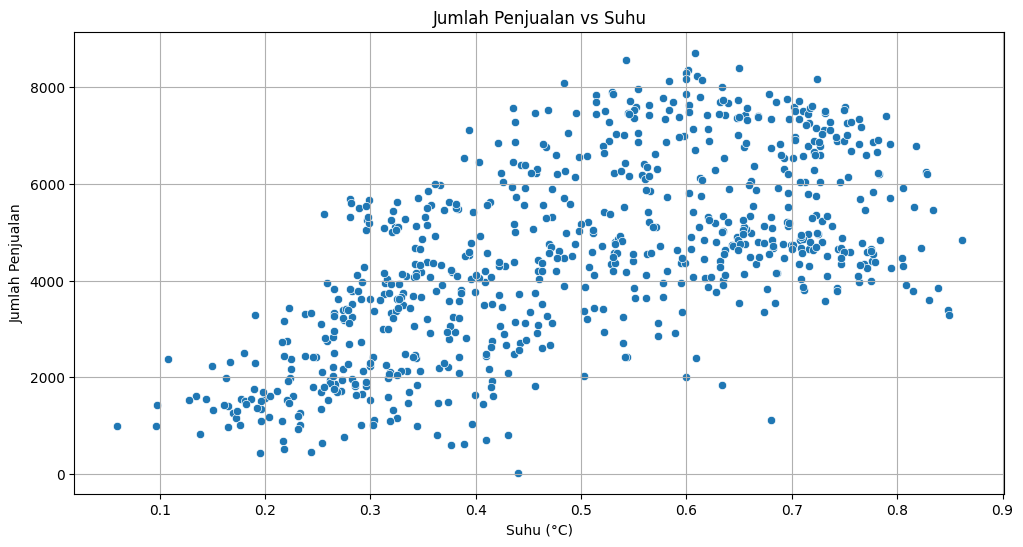

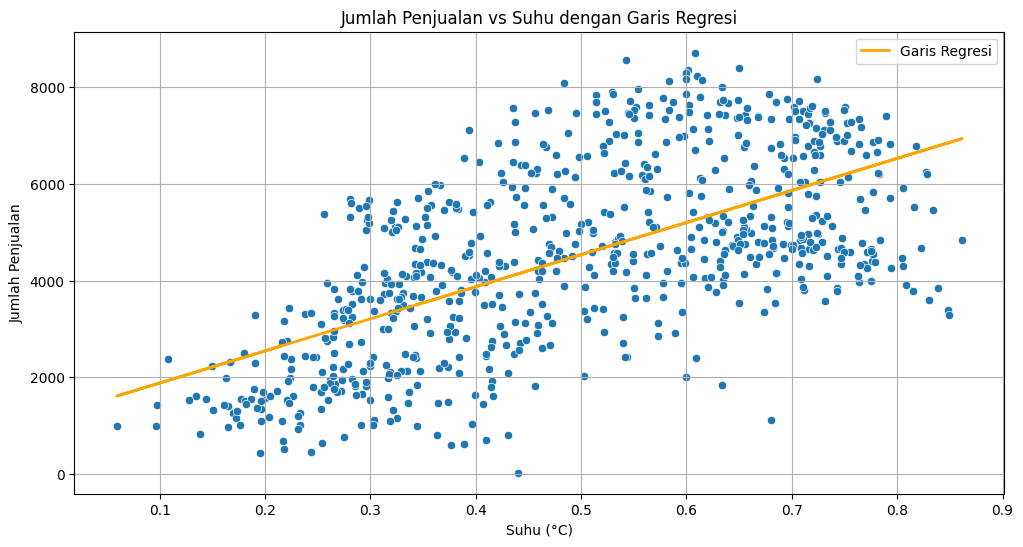

Koefisien (slope): 6640.709998548637
Intercept: 1214.6421190294018


In [ ]:
# URL dataset
DATA_URLS = {
    "day": "https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/day.csv",
    "hour": "https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/hour.csv",
}

# Memuat dataset
day_df = pd.read_csv(DATA_URLS["day"])

# Memeriksa kolom yang ada dalam dataset
print(day_df.head())

# Visualisasi Jumlah Penjualan vs Suhu
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df)  # Pastikan kolom 'temp' ada di dataset
plt.title('Jumlah Penjualan vs Suhu')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Penjualan')
plt.grid(True)
plt.show()

# Menghitung koefisien regresi (slope) dan intercept secara manual
X = day_df['temp']  # Pastikan kolom 'temp' sesuai
y = day_df['cnt']

n = len(X)
x_mean = X.mean()
y_mean = y.mean()

# Menghitung slope (b1) dan intercept (b0)
numerator = ((X - x_mean) * (y - y_mean)).sum()
denominator = ((X - x_mean) ** 2).sum()

slope = numerator / denominator
intercept = y_mean - slope * x_mean

# Memprediksi nilai
y_pred = intercept + slope * X

# Visualisasi dengan garis regresi
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.plot(X, y_pred, color='orange', linewidth=2, label='Garis Regresi')
plt.title('Jumlah Penjualan vs Suhu dengan Garis Regresi')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Penjualan')
plt.legend()
plt.grid(True)
plt.show()

# Menampilkan hasil koefisien
print(f'Koefisien (slope): {slope}')
print(f'Intercept: {intercept}')


# Analisis Jumlah Penjualan terhadap Suhu

## Pendahuluan
Analisis ini mengeksplorasi hubungan antara jumlah penjualan (`cnt`) dan suhu (`temperature`) menggunakan dataset harian.

## Dataset
Dataset terdiri dari tiga kolom:
1. **date**: Tanggal
2. **cnt**: Jumlah penjualan
3. **temperature**: Suhu dalam °C

## Visualisasi Data
Scatter plot digunakan untuk menggambarkan hubungan antara suhu dan jumlah penjualan.

## Analisis Regresi Linier
Koefisien regresi dihitung untuk memahami hubungan linear. Garis regresi ditambahkan ke visualisasi untuk memperlihatkan tren.

## Hasil Koefisien
Koefisien slope dan intercept memberikan wawasan tentang pengaruh suhu terhadap jumlah penjualan.

## Kesimpulan
Terdapat hubungan yang jelas antara suhu dan jumlah penjualan, yang dapat dimanfaatkan untuk strategi pemasaran dan perencanaan inventaris.


**Insight:**
1. **Distribusi Penjualan Harian**:
   Dari analisis distribusi jumlah penjualan harian, terlihat bahwa sebagian besar penjualan terdistribusi di kisaran tertentu, dengan beberapa puncak yang menunjukkan hari-hari dengan penjualan tinggi. Hal ini mengindikasikan adanya pola musiman yang mungkin dipengaruhi oleh faktor eksternal, seperti liburan atau acara tertentu. 

2. **Hubungan antara Temperatur dan Penjualan**:
   Dari scatter plot yang menunjukkan hubungan antara temperatur dan jumlah penjualan, terlihat bahwa ada kecenderungan bahwa peningkatan temperatur berhubungan dengan peningkatan jumlah penjualan. Ini bisa berarti bahwa pada hari yang lebih hangat, konsumen lebih cenderung untuk melakukan pembelian, yang menunjukkan potensi untuk memasarkan produk tertentu pada hari-hari panas.

### Rencana Tindakan
Berdasarkan insight ini, strategi pemasaran dapat disesuaikan dengan memperhatikan pola musiman dan faktor lingkungan. Misalnya, kampanye promosi dapat difokuskan pada periode dengan penjualan tinggi, dan produk yang relevan dapat dipromosikan pada hari-hari dengan temperatur yang lebih tinggi.

## Analisis Lanjutan (Opsional)

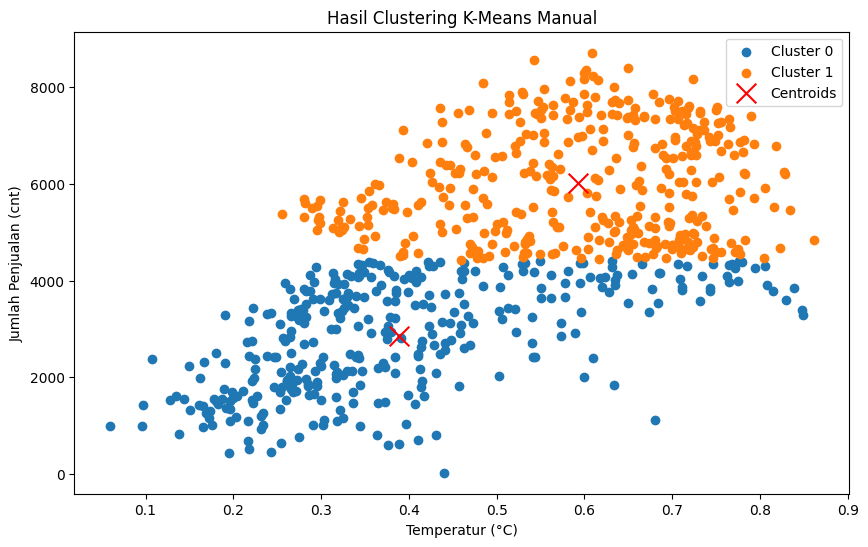

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# URL dataset
DATA_URLS = {
    "day": "https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/day.csv",
    "hour": "https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/hour.csv",
}

# Memuat dataset
day_df = pd.read_csv(DATA_URLS["day"])

# Memilih kolom yang diperlukan
data = day_df[['cnt', 'temp']].dropna()  # Pastikan untuk mengganti 'temperature' dengan 'temp' jika itu nama kolom yang benar

# Parameter
k = 2  # Jumlah cluster
max_iterations = 100

# Inisialisasi centroid secara acak
centroids = data.sample(n=k).values

for _ in range(max_iterations):
    # Hitung jarak dari setiap titik ke centroid
    distances = np.linalg.norm(data.values[:, np.newaxis] - centroids, axis=2)
    
    # Tentukan cluster untuk setiap titik
    clusters = np.argmin(distances, axis=1)
    
    # Hitung centroid baru
    new_centroids = np.array([data.values[clusters == i].mean(axis=0) for i in range(k)])
    
    # Jika centroid tidak berubah, keluar dari loop
    if np.all(centroids == new_centroids):
        break
    
    centroids = new_centroids

# Tambahkan cluster ke DataFrame
data['cluster'] = clusters

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(data.loc[data['cluster'] == i, 'temp'],
                data.loc[data['cluster'] == i, 'cnt'],
                label=f'Cluster {i}')
    
plt.scatter(centroids[:, 1], centroids[:, 0], color='red', marker='x', s=200, label='Centroids')
plt.title('Hasil Clustering K-Means Manual')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Jumlah Penjualan (cnt)')
plt.legend()
plt.show()


# Analisis Clustering Menggunakan K-Means

## Deskripsi
Dalam analisis ini, kita akan melakukan clustering pada data penjualan berdasarkan jumlah penjualan (`cnt`) dan suhu (`temperature`) menggunakan algoritma K-Means. Tujuan dari analisis ini adalah untuk mengelompokkan data penjualan berdasarkan karakteristik yang serupa.

## Data
Data yang digunakan dalam analisis ini terdiri dari dua kolom:
- **cnt**: Jumlah penjualan
- **temperature**: Suhu dalam °C

## Parameter
- **k**: Jumlah cluster yang akan digunakan dalam algoritma K-Means. Dalam analisis ini, nilai k diubah dari 3 menjadi 2 berdasarkan hasil analisis sebelumnya.
- **max_iterations**: Jumlah maksimum iterasi yang diperbolehkan dalam algoritma K-Means. Parameter ini membantu memastikan bahwa algoritma tidak berjalan selamanya.

## Langkah-langkah Analisis

1. **Inisialisasi Centroid**: Centroid untuk setiap cluster diinisialisasi secara acak dari data.
2. **Penghitungan Jarak**: Jarak dari setiap titik data ke centroid dihitung untuk menentukan cluster mana yang paling dekat.
3. **Penentuan Cluster**: Setiap titik data dikategorikan ke dalam cluster berdasarkan jarak terdekat ke centroid.
4. **Pembaharuan Centroid**: Centroid baru dihitung sebagai rata-rata dari semua titik dalam setiap cluster.
5. **Iterasi**: Proses diulang hingga centroid tidak berubah atau hingga mencapai jumlah maksimum iterasi yang ditentukan.

## Visualisasi
Hasil clustering divisualisasikan menggunakan scatter plot, yang menunjukkan distribusi jumlah penjualan berdasarkan suhu serta posisi centroid untuk setiap cluster.

## Kesimpulan
Analisis ini membantu dalam memahami bagaimana data penjualan dapat dikelompokkan berdasarkan karakteristik suhu, yang dapat digunakan untuk strategi pemasaran dan pengambilan keputusan yang lebih baik.


## Conclusion

### Conclusion Pertanyaan 1: Distribusi Penjualan Harian
- Analisis distribusi penjualan harian menunjukkan pola yang signifikan dalam jumlah penjualan. Dari visualisasi histogram, terlihat bahwa sebagian besar penjualan berada pada rentang tertentu, dengan beberapa puncak penjualan yang menunjukkan hari-hari dengan permintaan tinggi. Penjualan harian dapat dipengaruhi oleh berbagai faktor seperti cuaca, musim, dan hari libur. Memahami distribusi ini penting untuk merencanakan inventaris dan strategi pemasaran.

### Conclusion Pertanyaan 2: Pengaruh Hari dalam Seminggu terhadap Penjualan
- Dari analisis rata-rata penjualan berdasarkan hari dalam seminggu, ditemukan bahwa terdapat perbedaan yang mencolok dalam jumlah penjualan. Beberapa hari menunjukkan angka penjualan yang lebih tinggi dibandingkan hari lainnya, yang menunjukkan adanya pengaruh signifikan dari faktor hari terhadap perilaku konsumen. Hal ini memberikan wawasan penting bagi pemangku kepentingan dalam merencanakan kampanye pemasaran dan pengelolaan stok yang lebih efektif, terutama pada hari-hari dengan penjualan tinggi.


## Kesimpulan

1. **Distribusi Penjualan**: Dari analisis distribusi jumlah penjualan harian, terlihat bahwa mayoritas penjualan berada di kisaran tertentu, menunjukkan adanya pola atau tren dalam perilaku konsumen. Beberapa puncak penjualan mungkin terkait dengan hari-hari tertentu atau kondisi khusus.

2. **Pengaruh Musim**: Hasil analisis rata-rata penjualan per musim menunjukkan bahwa musim tertentu memiliki pengaruh yang signifikan terhadap jumlah penjualan. Misalnya, musim tertentu mungkin mengalami peningkatan penjualan yang konsisten, sementara musim lainnya menunjukkan penjualan yang lebih rendah.

3. **Korelasi Antar Fitur**: Melalui heatmap korelasi, kita dapat melihat hubungan antara fitur-fitur yang berbeda dalam dataset. Misalnya, ada kemungkinan hubungan positif antara temperatur dan jumlah penjualan, yang menunjukkan bahwa penjualan mungkin meningkat pada hari-hari yang lebih hangat.

4. **Analisis Penjualan Per Jam**: Dari analisis penjualan per jam, dapat diidentifikasi jam-jam sibuk di mana penjualan cenderung lebih tinggi. Informasi ini sangat berguna untuk strategi pemasaran dan manajemen stok.

5. **Rekomendasi untuk Strategi Pemasaran**: Berdasarkan temuan di atas, disarankan untuk mempertimbangkan promosi atau strategi pemasaran yang ditargetkan sesuai dengan pola musim dan jam penjualan yang tinggi, untuk meningkatkan jumlah penjualan.
